<a href="https://colab.research.google.com/github/Parkseojin2001/Deep-learning_with_Python/blob/main/chapter04_getting_started_with_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
tf.keras.backend.set_floatx('float16')

## 4.1.1 IMBD 데이터셋

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
# 리뷰를 다시 텍스트로 디코딩
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)

1641221/1641221 [==============================] - 0s 0us/step


In [5]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [8]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [9]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
history = model.fit(partial_x_train,
											partial_y_train,
											epochs=20,
											batch_size=512,
											validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 8s 75ms/step - loss: 0.5137 - accuracy: 0.7808 - val_loss: 0.3853 - val_accuracy: 0.8623
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3118 - accuracy: 0.8945 - val_loss: 0.3125 - val_accuracy: 0.8770
Epoch 3/20
30/30 [==============================] - 2s 52ms/step - loss: 0.2347 - accuracy: 0.9199 - val_loss: 0.2937 - val_accuracy: 0.8838
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1931 - accuracy: 0.9341 - val_loss: 0.2756 - val_accuracy: 0.8862
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1608 - accuracy: 0.9458 - val_loss: 0.2849 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1371 - accuracy: 0.9556 - val_loss: 0.3015 - val_accuracy: 0.8809
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1201 - accuracy: 0.9609 - val_loss: 0.3010 - val_accuracy: 0.8833
Epoch 8/20
30

In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

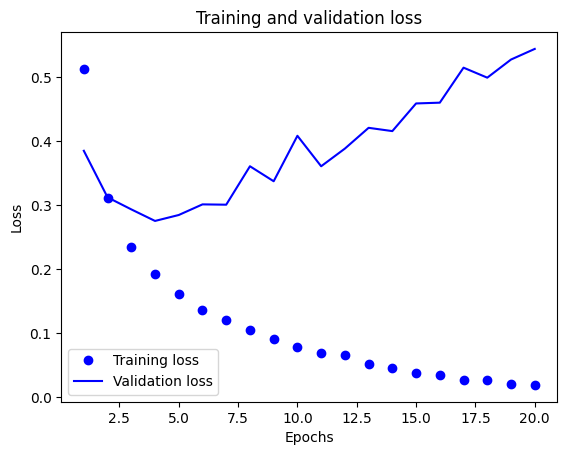

In [13]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

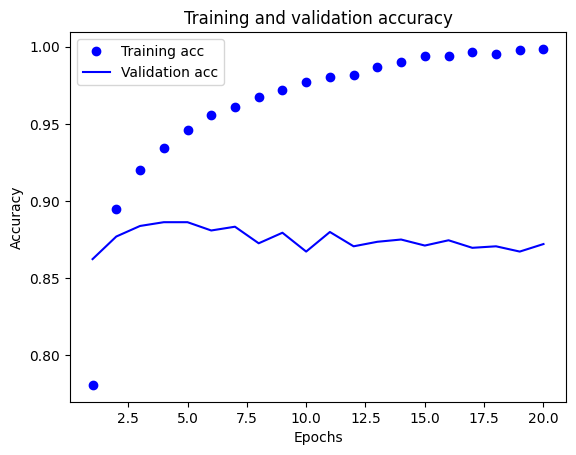

In [14]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
# 훈련세트 + 검증세트
model.compile(optimizer="rmsprop",
								loss="binary_crossentropy",
								metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.5239 - accuracy: 0.7856
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.3154 - accuracy: 0.8984
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2357 - accuracy: 0.9199
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.2886 - accuracy: 0.9199


In [16]:
model.predict(x_test)

782/782 [==============================] - 3s 4ms/step


array([[0.2208 ],
       [0.991  ],
       [0.8857 ],
       ...,
       [0.1184 ],
       [0.09204],
       [0.584  ]], dtype=float16)

In [17]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [18]:
len(train_data)

8982

In [19]:
len(test_data)

2246

In [20]:
# 로이터 데이터셋을 텍스트로 디코딩하기
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [21]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [22]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

In [23]:
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [24]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
# 케라스 내장 함수 사용
from tensorflow.keras.utils import to_categorical

y_train_ = to_categorical(train_labels)
y_test_ = to_categorical(test_labels)

In [26]:
y_train_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [28]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [29]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [30]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 39ms/step - loss: 2.9141 - accuracy: 0.4800 - val_loss: 1.9600 - val_accuracy: 0.6050
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 1.6309 - accuracy: 0.6758 - val_loss: 1.4238 - val_accuracy: 0.6782
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.2402 - accuracy: 0.7329 - val_loss: 1.2256 - val_accuracy: 0.7290
Epoch 4/20
16/16 [==============================] - 0s 21ms/step - loss: 1.0176 - accuracy: 0.7749 - val_loss: 1.1211 - val_accuracy: 0.7559
Epoch 5/20
16/16 [==============================] - 0s 13ms/step - loss: 0.8550 - accuracy: 0.8140 - val_loss: 1.0469 - val_accuracy: 0.7749
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 0.7217 - accuracy: 0.8457 - val_loss: 1.0039 - val_accuracy: 0.7832
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6079 - accuracy: 0.8716 - val_loss: 0.9570 - val_accuracy: 0.8008
Epoch 8/20
16

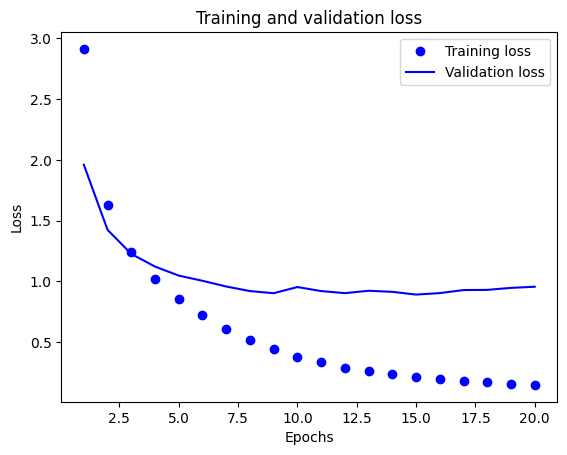

In [31]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

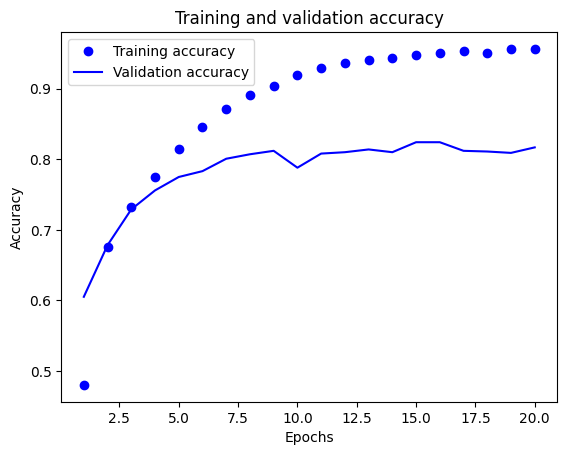

In [32]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label ="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [33]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 2s 9ms/step - loss: 2.6152 - accuracy: 0.5273
Epoch 2/9
18/18 [==============================] - 0s 10ms/step - loss: 1.4688 - accuracy: 0.6875
Epoch 3/9
18/18 [==============================] - 0s 10ms/step - loss: 1.1270 - accuracy: 0.7534
Epoch 4/9
18/18 [==============================] - 0s 14ms/step - loss: 0.9233 - accuracy: 0.8047
Epoch 5/9
18/18 [==============================] - 0s 9ms/step - loss: 0.7695 - accuracy: 0.8379
Epoch 6/9
18/18 [==============================] - 0s 11ms/step - loss: 0.6392 - accuracy: 0.8662
Epoch 7/9
18/18 [==============================] - 0s 14ms/step - loss: 0.5396 - accuracy: 0.8867
Epoch 8/9
18/18 [==============================] - 0s 12ms/step - loss: 0.4617 - accuracy: 0.9019
Epoch 9/9
71/71 [==============================] - 0s 4ms/step - loss: 0.9136 - accuracy: 0.7910


In [34]:
results # 정확도: 약 80%

[0.91357421875, 0.791015625]

In [35]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 4ms/step


In [36]:
# 정수 텐서로 변환
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [37]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [38]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 3.4023 - accuracy: 0.1022 - val_loss: 2.7871 - val_accuracy: 0.5518
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 2.2051 - accuracy: 0.5854 - val_loss: 1.7520 - val_accuracy: 0.6191
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 1.4961 - accuracy: 0.6411 - val_loss: 1.4404 - val_accuracy: 0.6582
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.2539 - accuracy: 0.7002 - val_loss: 1.3633 - val_accuracy: 0.6870
Epoch 5/20
63/63 [==============================] - 0s 8ms/step - loss: 1.1260 - accuracy: 0.7314 - val_loss: 1.3135 - val_accuracy: 0.6982
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 1.0342 - accuracy: 0.7461 - val_loss: 1.2861 - val_accuracy: 0.6929
Epoch 7/20
63/63 [==============================] - 0s 8ms/step - loss: 0.9580 - accuracy: 0.7563 - val_loss: 1.2803 - val_accuracy: 0.6958
Epoch 8/20
63/63 [=

## 4.3 주택 가격 예측: 회귀 문제

In [39]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [40]:
train_data.shape

(404, 13)

In [41]:
test_data.shape

(102, 13)

In [42]:
train_targets[:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

In [43]:
# 데이터 정규화하기
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [44]:
# 모델 정의하기
def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return model

In [45]:
# K-겹 검증하기
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print(f"#{i}번째 폴드 처리중")
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i + 1) * num_val_samples:]],
      axis = 0)
  partial_train_targets = np.concatenate(
      [train_targets[: i * num_val_samples],
       train_targets[(i + 1) * num_val_samples:]], axis = 0)
  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
            epochs=num_epochs, batch_size=16, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
  all_scores.append(val_mae)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [46]:
all_scores

[1.8466796875, 2.349609375, 2.318359375, 2.359375]

In [47]:
np.mean(all_scores)

2.218505859375

In [60]:
# 각 폴드의 검증 점수 저장하기
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [61]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

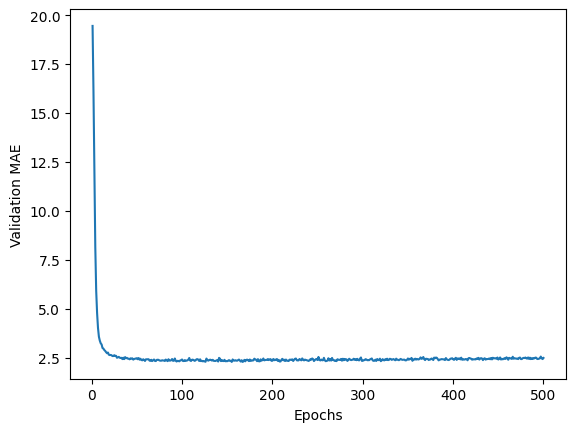

In [62]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

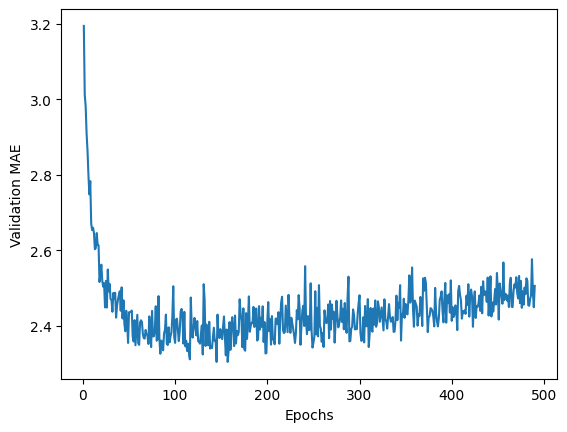

In [63]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [64]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 17.0938 - mae: 2.5879


In [65]:
test_mae_score

2.587890625

In [66]:
predictions = model.predict(test_data)
predictions[0] # 테서트 세트의 첫 번째 주택의 가격 예측값

4/4 [==============================] - 0s 3ms/step


array([7.883], dtype=float16)